### gamma burst rate comparison
This code get gamma burst rate of vis_tone_only task and vis_contrast_recall task and compare the burst rate during delay.

Two methods to get gamma were used:  
1) NBG and BBG were mean amplitude within frequency band  
2) NBG and BBG were directly extracted during decomposition (Hilbert transform)

In [1]:
import os
import numpy as np
from ECoGBurst import SpectralBurst
from scipy import stats
from functools import reduce
import matplotlib.pyplot as plt
import concurrent.futures

In [2]:
# subject information
sbj_name   = 'YBN'
tone_blk   = ['036']
recall_blk = ['038','039','040']

In [3]:
# home directory
home_path = '~/Documents/MATLAB/ECoG'
home_dir  = os.path.expanduser(home_path)

In [4]:
# initiate burst detection object
burst_tone_obj = SpectralBurst(sbj_name = sbj_name, 
                               blk_name = tone_blk, 
                               task_name = 'vis_tone_only')
burst_recall_obj = SpectralBurst(sbj_name = sbj_name,
                               blk_name = recall_blk,
                               task_name = 'vis_contrast_recall')

In [5]:
# get good visual electrodes
elec_list_tone   = burst_tone_obj.select_channel()
elec_list_recall = burst_recall_obj.select_channel() 

elect_select = reduce(np.intersect1d, (elec_list_tone, elec_list_recall))
elect_select = elect_select.astype(int)
elect_select_list = elect_select.tolist()

In [25]:
def plot_gamma_burst_rate(bursts, ci):
    '''
    plot out burst_rate
    
    Args:
    bursts: a dictionary with burst events of NBG and BBG of two tasks
    ci: channel number of the electrode
    
    Return:
    None.
    '''
    NBG_burst_tone,   BBG_burst_tone     = bursts['NBG_burst_tone'],   bursts['BBG_burst_tone']
    NBG_burst_recall, BBG_burst_recall   = bursts['NBG_burst_recall'], bursts['BBG_burst_recall']
    
    # calculate burst rate
    tone_NBG_burst_rate   = np.mean(NBG_burst_tone, axis = 0)
    tone_BBG_burst_rate   = np.mean(BBG_burst_tone, axis = 0)
    recall_NBG_burst_rate = np.mean(NBG_burst_recall, axis = 0)
    recall_BBG_burst_rate = np.mean(BBG_burst_recall, axis = 0)
    
    fig, axs = plt.subplots(2,1, figsize= (10,10))
    plt.setp(axs, xticks = np.arange(0,7501,500), xticklabels = np.arange(-2500,5001,500),
                  xlabel = 'Time(ms)', ylabel = 'Burst Rate')
    
    axs[0].plot(tone_NBG_burst_rate, label = 'tone_only', color = 'blue')
    axs[0].plot(recall_NBG_burst_rate, label = 'recall', color = 'orange')
    axs[0].axvline(x=3000, color = 'k', linestyle = '--')
    axs[0].axvline(x=6000, color = 'k', linestyle = '--')
    axs[0].set_title('NBG burst rate')
    axs[0].legend()

    axs[1].plot(tone_BBG_burst_rate, label = 'tone_only', color = 'blue')
    axs[1].plot(recall_BBG_burst_rate, label = 'recall', color = 'orange')
    axs[1].axvline(x=3000, color = 'k', linestyle = '--')
    axs[1].axvline(x=6000, color = 'k', linestyle = '--')
    axs[1].set_title('BBG burst rate')
    axs[1].legend()
    

Take channel 107 as an example.

Burst rate using **method 1**: NBG and BBG were mean amplitude within frequency band shown as following.

In [30]:
# apply gamma burst detection
NBG_burst_tone_average,   BBG_burst_tone_average   = burst_tone_obj.gamma_burst(107, gamma_type = 'average')
NBG_burst_recall_average, BBG_burst_recall_average = burst_recall_obj.gamma_burst(107, gamma_type = 'average')

NBG_burst_tone_decomp,   BBG_burst_tone_decomp   = burst_tone_obj.gamma_burst(107, gamma_type = 'decomp')
NBG_burst_recall_decomp, BBG_burst_recall_decomp = burst_recall_obj.gamma_burst(107, gamma_type = 'decomp')

bursts_average = {'NBG_burst_tone': NBG_burst_tone_average,     'BBG_burst_tone': BBG_burst_tone_average,
                  'NBG_burst_recall': NBG_burst_recall_average, 'BBG_burst_recall': BBG_burst_recall_average}

bursts_decomp  = {'NBG_burst_tone': NBG_burst_tone_decomp,      'BBG_burst_tone': BBG_burst_tone_decomp,
                  'NBG_burst_recall': NBG_burst_recall_decomp,  'BBG_burst_recall': BBG_burst_recall_decomp}

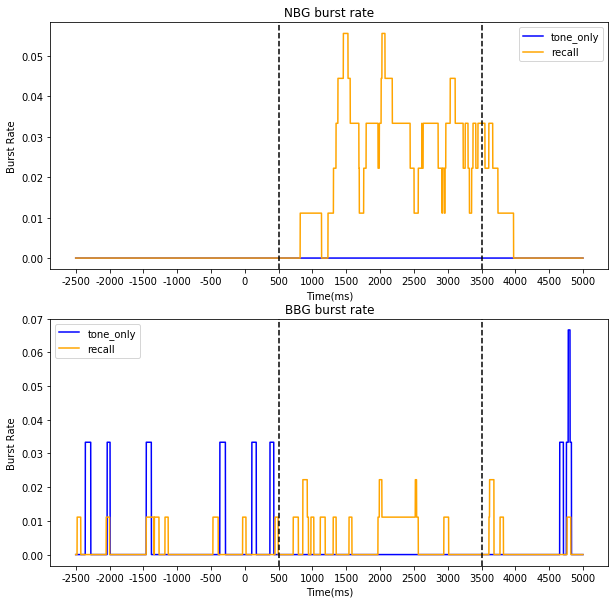

In [26]:
plot_gamma_burst_rate(bursts_average,107)

Burst rate using **method 2**: NBG and BBG were extracted during decomposition.

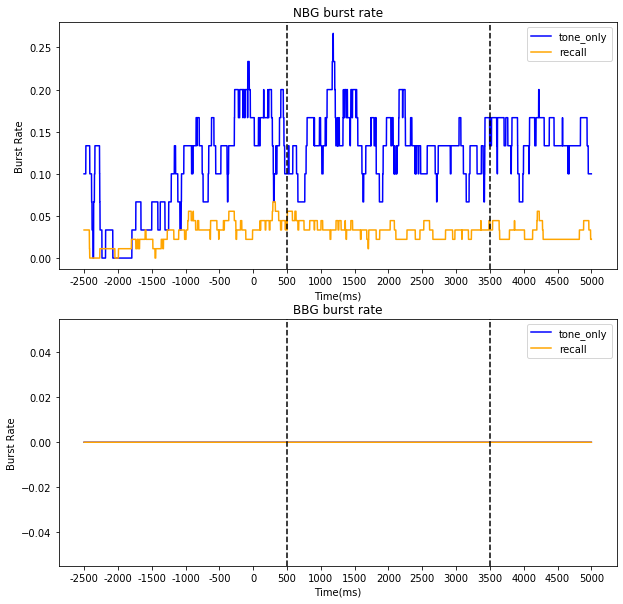

In [31]:
plot_gamma_burst_rate(bursts_decomp,107)

Another example (Chan 112):

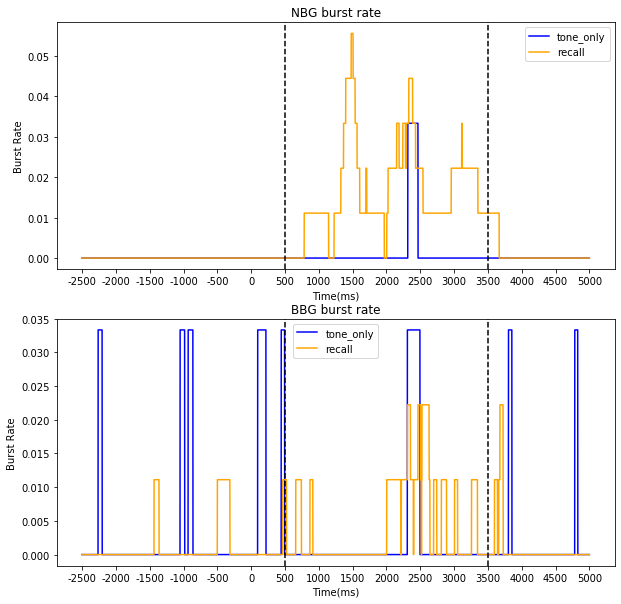

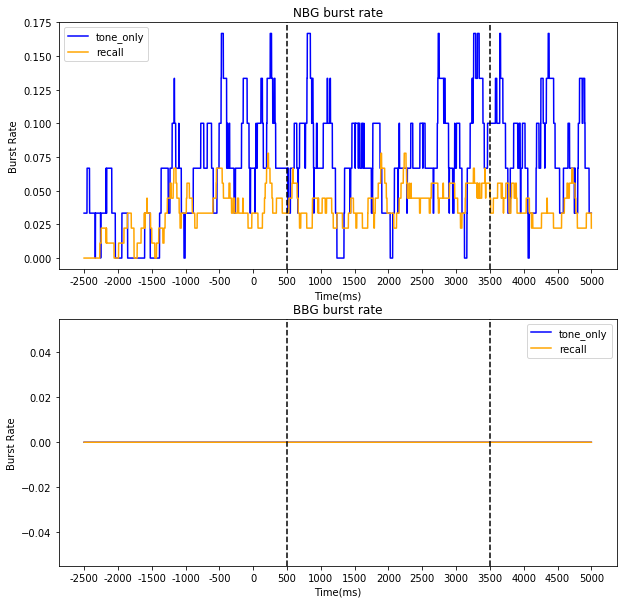

In [32]:
NBG_burst_tone_average,   BBG_burst_tone_average   = burst_tone_obj.gamma_burst(112, gamma_type = 'average')
NBG_burst_recall_average, BBG_burst_recall_average = burst_recall_obj.gamma_burst(112, gamma_type = 'average')

NBG_burst_tone_decomp,   BBG_burst_tone_decomp   = burst_tone_obj.gamma_burst(112, gamma_type = 'decomp')
NBG_burst_recall_decomp, BBG_burst_recall_decomp = burst_recall_obj.gamma_burst(112, gamma_type = 'decomp')

bursts_average = {'NBG_burst_tone': NBG_burst_tone_average,     'BBG_burst_tone': BBG_burst_tone_average,
                  'NBG_burst_recall': NBG_burst_recall_average, 'BBG_burst_recall': BBG_burst_recall_average}

bursts_decomp  = {'NBG_burst_tone': NBG_burst_tone_decomp,      'BBG_burst_tone': BBG_burst_tone_decomp,
                  'NBG_burst_recall': NBG_burst_recall_decomp,  'BBG_burst_recall': BBG_burst_recall_decomp}
plot_gamma_burst_rate(bursts_average,112)
plot_gamma_burst_rate(bursts_decomp,112)